In [1]:
import visualization
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from configparser import ConfigParser
from visualization import ids_to_greyscale, load_depth, show_bounding_boxes, load_stencil_ids, load_stencil_flags
import pandas as pd
import glob

In [2]:
visualization.ini_file = "gta-postprocessing.local.ini"
visualization.multi_page = False
visualization.use_cache = False
CONFIG = ConfigParser()
CONFIG.read(visualization.ini_file)
in_directory = CONFIG["Images"]["Tiff"]

In [3]:
def load_im_and_stencil(name):
    im = Image.open(os.path.join(in_directory, name + '.tiff'))
    im = im.convert('RGB')
    stencil_ids = load_stencil_ids(name)
    stencil_flags = load_stencil_flags(name)
    return im, stencil_ids, stencil_flags

### discovered semantics

| number | meaning |
| --- | --- |
| 0 | background texture, all buildings and solid objects, even movable solid objects |
| 1 | pedestrian |
| 2 | vehicle |
| 3 | trees, bushes, grass |
| 4 | grass-like background texture |
| 5 | unknown |
| 6 | unknown |
| 7 | sky |

| flag | meaning |
| --- | --- |
| xxx1 | artificial light source |
| xx1x | main character's car |
| x1xx | unknown |
| 1xxx | main player character |


### now I'll inspect stencil semantics

In [4]:
im, stencil_ids, stencil_flags = load_im_and_stencil('2018-07-18--23-14-26--956')

In [5]:
print('stencil id values')
display(pd.Series(stencil_ids.flatten()).value_counts())
print('stencil flag values')
display(pd.Series(stencil_flags.flatten()).value_counts())

stencil id values


0    727587
7    507023
3    124346
4     68566
2     11932
1       534
8        12
dtype: int64

stencil flag values


0    1440000
dtype: int64

<IPython.core.display.Javascript object>


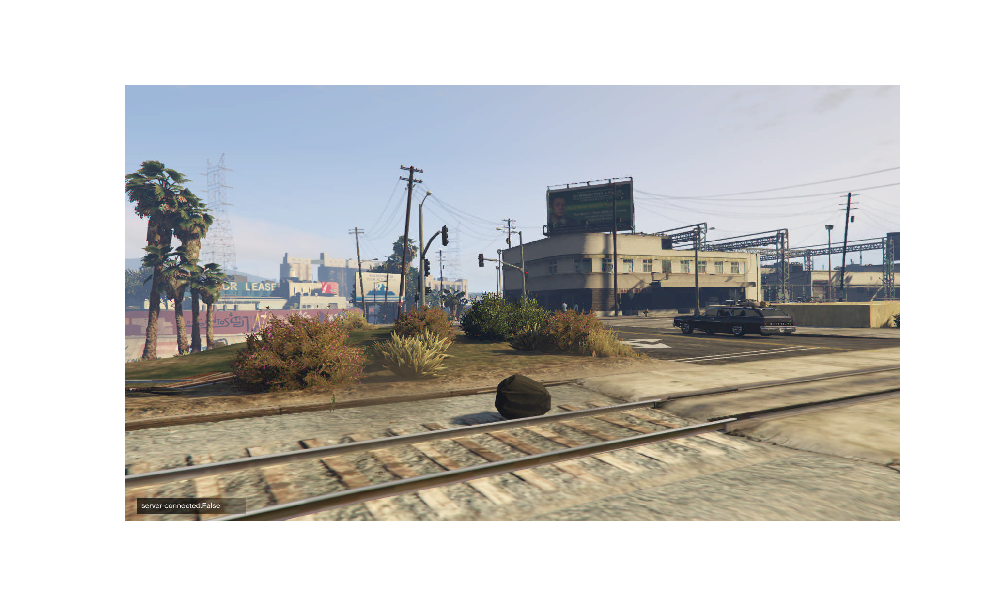

<IPython.core.display.Javascript object>


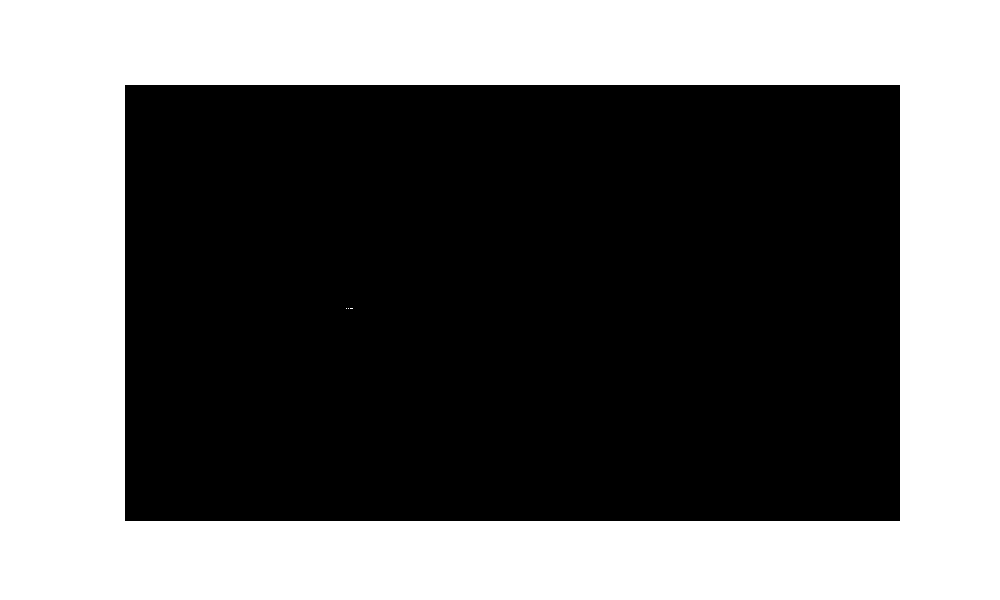

<IPython.core.display.Javascript object>


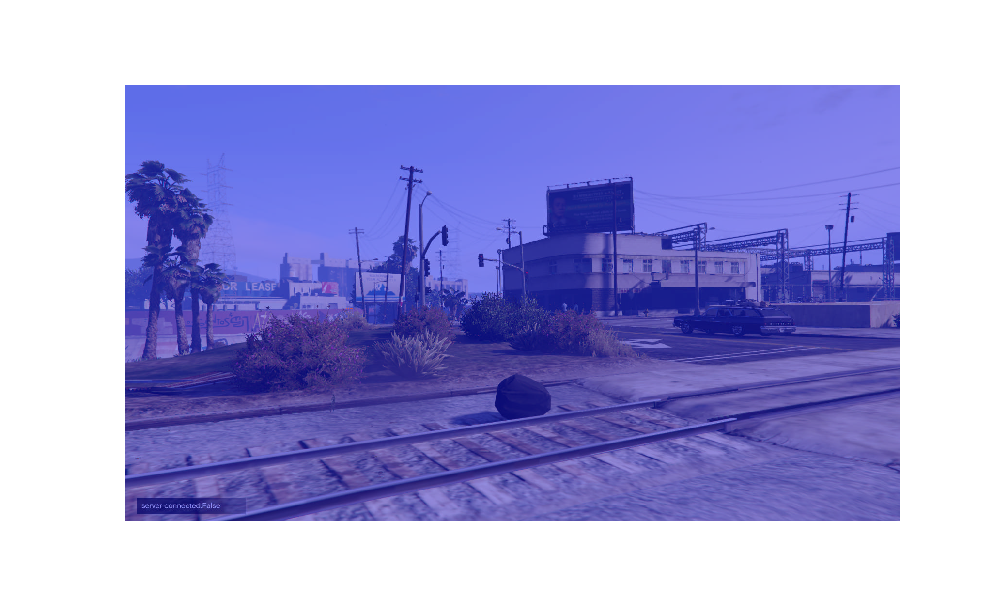

In [6]:
%matplotlib notebook

fig = plt.figure(figsize=(10,6))
fig.tight_layout()
plt.axis('off')
plt.imshow(im)

fig = plt.figure(figsize=(10,6))
fig.tight_layout()
plt.axis('off')
plt.imshow(stencil_ids == 8, cmap='gray')
    
fig = plt.figure(figsize=(10,6))
fig.tight_layout()
plt.axis('off')
plt.imshow(im)
plt.imshow(stencil_ids == 8, cmap='bwr', alpha=.4)


In [7]:
im, stencil_ids, stencil_flags = load_im_and_stencil('2018-07-18--23-13-55--877')
print('stencil id values')
display(pd.Series(stencil_ids.flatten()).value_counts())
print('stencil flag values')
display(pd.Series(stencil_flags.flatten()).value_counts())

stencil id values


0    622102
7    521254
4    154437
3    115029
2     24227
1      2951
dtype: int64

stencil flag values


0     1436442
32       3430
16        128
dtype: int64

<IPython.core.display.Javascript object>


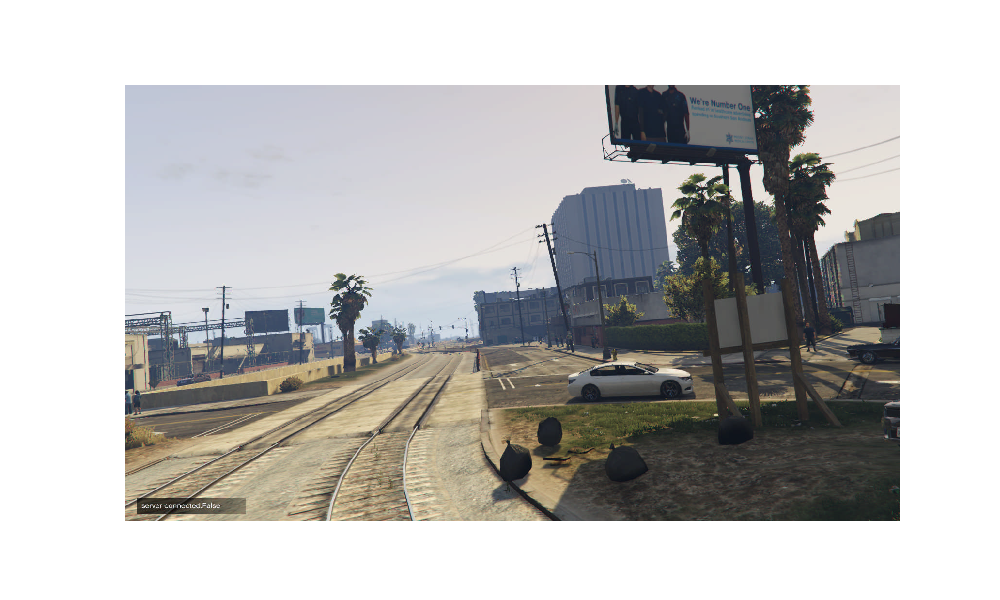

<IPython.core.display.Javascript object>


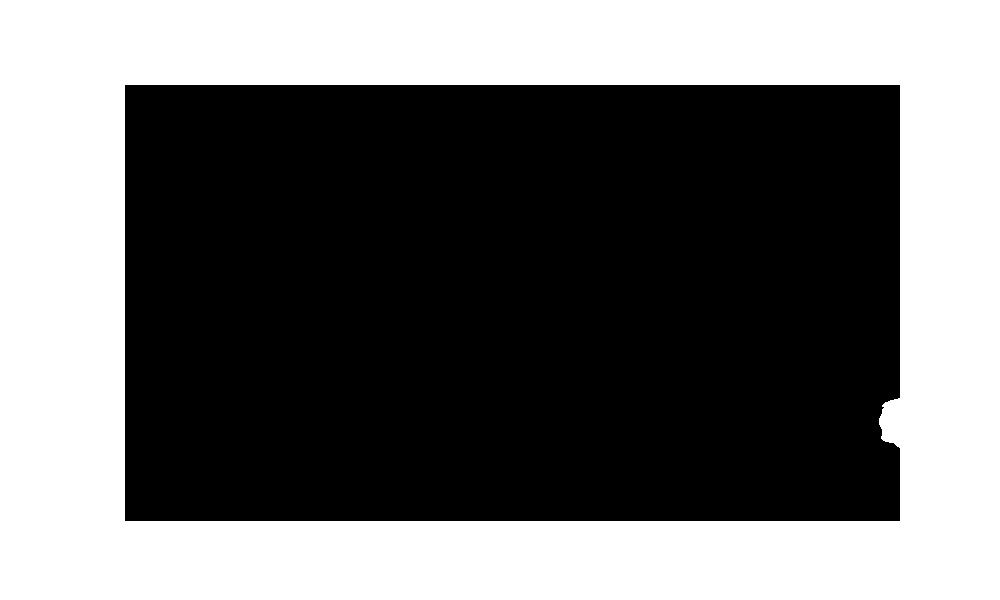

<IPython.core.display.Javascript object>


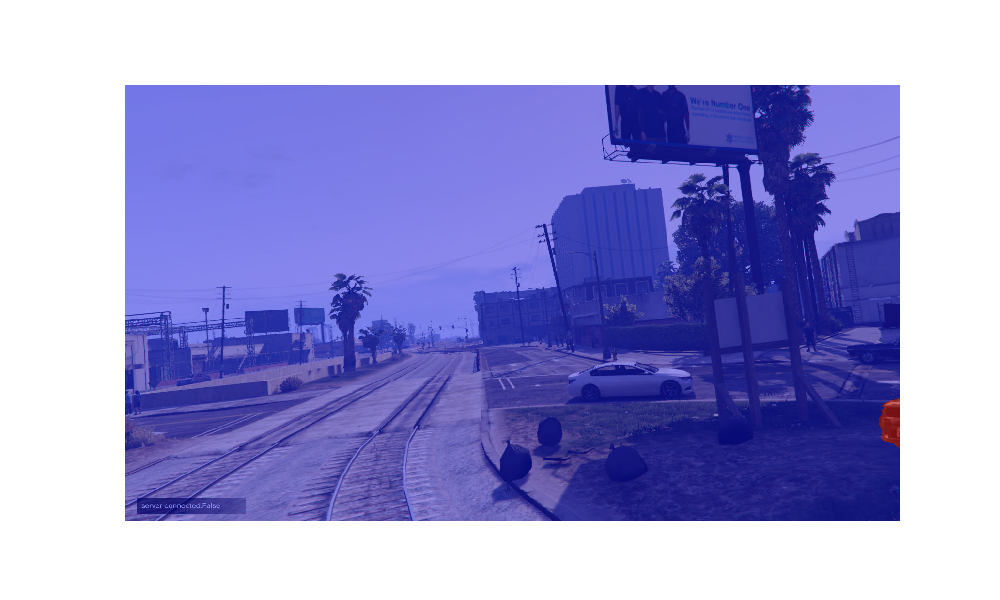

In [8]:
%matplotlib notebook

fig = plt.figure(figsize=(10,6))
fig.tight_layout()
plt.axis('off')
plt.imshow(im)

fig = plt.figure(figsize=(10,6))
fig.tight_layout()
plt.axis('off')
plt.imshow(stencil_flags == 32, cmap='gray')
    
fig = plt.figure(figsize=(10,6))
fig.tight_layout()
plt.axis('off')
plt.imshow(im)
plt.imshow(stencil_flags == 32, cmap='bwr', alpha=.4)


In [9]:
im, stencil_ids, stencil_flags = load_im_and_stencil('2018-07-18--23-13-54--980')
print('stencil id values')
display(pd.Series(stencil_ids.flatten()).value_counts())
print('stencil flag values')
display(pd.Series(stencil_flags.flatten()).value_counts())

stencil id values


0    630751
7    501587
4    157414
3    125235
2     23392
1      1621
dtype: int64

stencil flag values


0      1431507
32        8277
128        215
144          1
dtype: int64

<IPython.core.display.Javascript object>


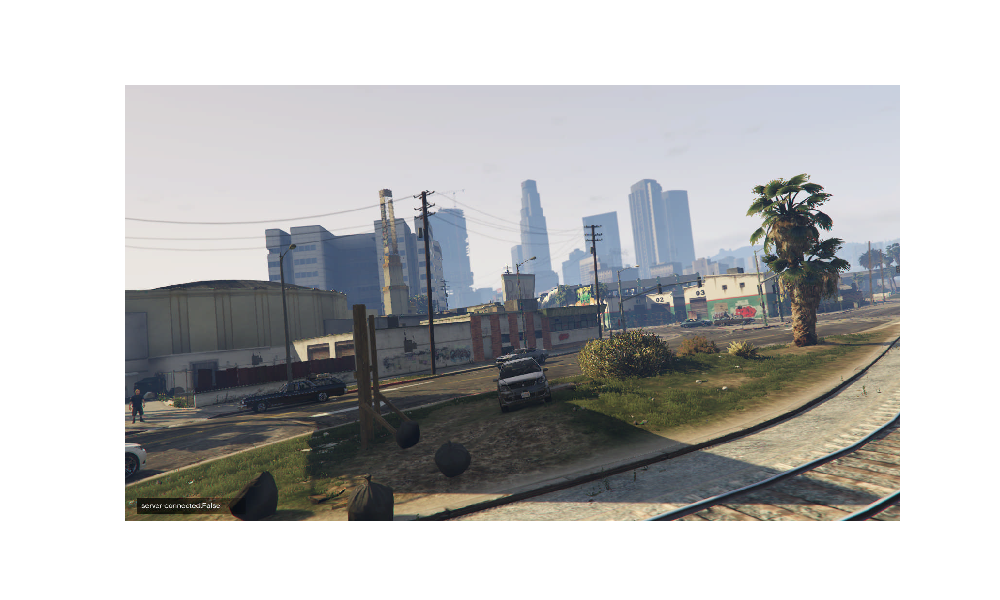

<IPython.core.display.Javascript object>


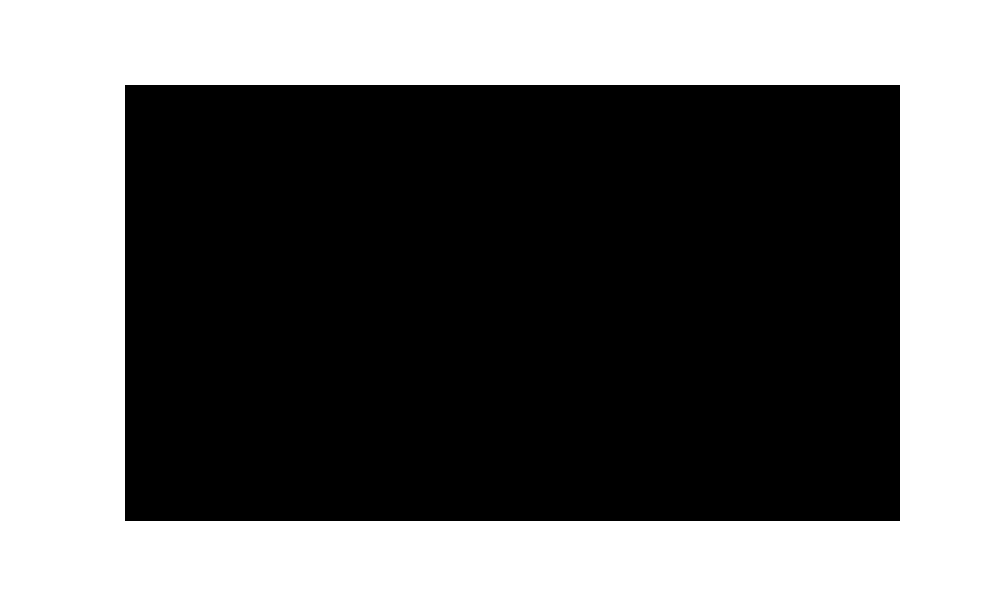

<IPython.core.display.Javascript object>


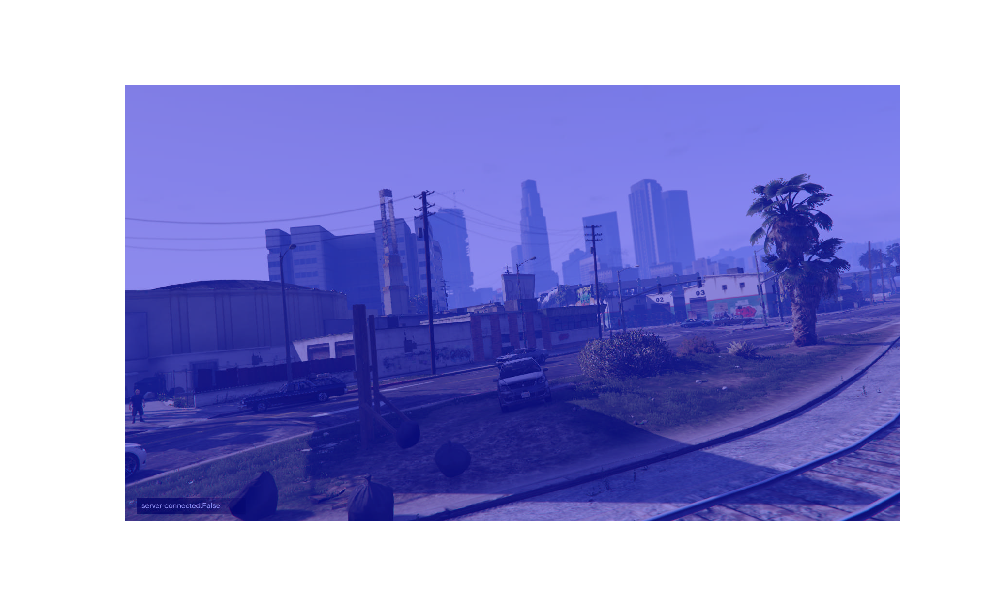

In [10]:
%matplotlib notebook

fig = plt.figure(figsize=(10,6))
fig.tight_layout()
plt.axis('off')
plt.imshow(im)

fig = plt.figure(figsize=(10,6))
fig.tight_layout()
plt.axis('off')
plt.imshow(stencil_flags == 144, cmap='gray')
    
fig = plt.figure(figsize=(10,6))
fig.tight_layout()
plt.axis('off')
plt.imshow(im)
plt.imshow(stencil_flags == 144, cmap='bwr', alpha=.4)


In [11]:
"{0:b}".format(144)[:-4]

'1001'

In [12]:
## loading them all to see as many values as possible
pattern = '[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]--[0-9][0-9]-[0-9][0-9]-[0-9][0-9]--[0-9][0-9][0-9].tiff'
files = glob.glob(os.path.join(in_directory, pattern))
files_to_use = files[:50]
print(len(files_to_use))
ims = []
stencils_ids = []
stencils_flags = []
for name in files_to_use:
    im, stencil_ids, stencil_flags = load_im_and_stencil('2018-07-18--23-14-26--956')
    ims.append(np.array(im))
    stencils_ids.append(stencil_ids)
    stencils_flags.append(stencil_flags)
    

50


In [ ]:
pd.Series(np.concatenate(ims).ravel())

In [13]:
np.concatenate(ims).ravel()

array([157, 182, 217, ..., 202, 184, 156], dtype=uint8)